<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Vector Representations
## *Data Science Unit 4 Sprint 2 Assignment 2*

In [1]:
import re
import string

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import spacy

from bs4 import BeautifulSoup

In [272]:
nlp = spacy.load("en_core_web_lg")

## 1) *Clean:* Job Listings from indeed.com that contain the title "Data Scientist" 

You have `job_listings.csv` in the data folder for this module. The text data in the description column is still messy - full of html tags. Use the [BeautifulSoup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) library to clean up this column. You will need to read through the documentation to accomplish this task. 

In [273]:
from bs4 import BeautifulSoup
import requests

listings = pd.read_csv("data/job_listings.csv")
                
listings.head()

,Unnamed: 0,description,title
0,0,"b""<div><div>Job Requirements:</div><ul><li><p>...",Data scientist
1,1,b'<div>Job Description<br/>\n<br/>\n<p>As a Da...,Data Scientist I
2,2,b'<div><p>As a Data Scientist you will be work...,Data Scientist - Entry Level
3,3,"b'<div class=""jobsearch-JobMetadataHeader icl-...",Data Scientist
4,4,b'<ul><li>Location: USA \xe2\x80\x93 multiple ...,Data Scientist


In [274]:
listings['description'][1]

'b\'<div>Job Description<br/>\\n<br/>\\n<p>As a Data Scientist 1, you will help us build machine learning models, data pipelines, and micro-services to help our clients navigate their healthcare journey. You will do so by empowering and improving the next generation of Accolade Applications and user experiences.</p><p><b>\\nA day in the life\\xe2\\x80\\xa6</b></p><ul><li>\\nWork with a small agile team to design and develop mobile applications in an iterative fashion.</li><li>\\nWork with a tight-knit group of development team members in Seattle.</li><li>\\nContribute to best practices and help guide the future of our applications.</li><li>\\nOperates effectively as a collaborative member of the development team.</li><li>\\nOperates effectively as an individual for quick turnaround of enhancements and fixes.</li><li>\\nResponsible for meeting expectations and deliverables on time with high quality.</li><li>\\nDrive and implement new features within our mobile applications.</li><li>\\nP

In [275]:
listings.drop('Unnamed: 0', axis=1, inplace=True)

In [276]:
listings.head(1)

,description,title
0,"b""<div><div>Job Requirements:</div><ul><li><p>...",Data scientist


In [280]:
def get_text(html_doc):
    soup = BeautifulSoup(html_doc, 'html.parser')
    text = soup.get_text()
    a = text.replace("b\'", '')
    a = a.replace('\\n', ' ')
    a = a.replace('\\xe2\\x80\\xa6', ':')
    a = a.replace('\\xe2\\x80\\x99', "'")
    a = a.replace('\\xe2\\x80\\x93', '')
    lower = re.sub('[^a-zA-Z 0-9]', '', a)
    lower = lower.lower()
    return lower

In [281]:
listings['description']=listings['description'].apply(get_text)
listings.head()

,description,title
0,bjob requirements conceptual understanding in ...,Data scientist
1,job description as a data scientist 1 you wil...,Data Scientist I
2,as a data scientist you will be working on con...,Data Scientist - Entry Level
3,4969 6756 a monthcontractunder the general su...,Data Scientist
4,location usa multiple locations 2 years of an...,Data Scientist


## 2) Use Spacy to tokenize the listings 

In [283]:
##### Your Code Here #####
def spacy_token(text):
    doc = nlp(text)
    tokens = []
    for token in doc:
        if (token.is_stop != True) and (token.is_punct != True):
            tokens.append(token.lemma_.lower())
    return tokens

In [284]:
listings['tokenized']=listings['description'].apply(spacy_token)

In [285]:
listings.head()

,description,title,tokenized
0,bjob requirements conceptual understanding in ...,Data scientist,"[bjob, requirement, conceptual, understanding,..."
1,job description as a data scientist 1 you wil...,Data Scientist I,"[job, description, , data, scientist, 1, help..."
2,as a data scientist you will be working on con...,Data Scientist - Entry Level,"[data, scientist, work, consult, business, res..."
3,4969 6756 a monthcontractunder the general su...,Data Scientist,"[4969, , 6756, monthcontractunder, general, s..."
4,location usa multiple locations 2 years of an...,Data Scientist,"[location, usa, , multiple, location, 2, year..."


In [286]:
nlp = spacy.load("en_core_web_lg")

## 3) Use Scikit-Learn's CountVectorizer to get word counts for each listing.

In [287]:
##### Your Code Here #####
vect = CountVectorizer(analyzer='word', stop_words = 'english')
vect.fit(listings['description']);

dtm = vect.transform(listings['description'])

listings_df = pd.DataFrame(data = dtm.toarray(), columns = vect.get_feature_names())

In [288]:
print(vect.get_stop_words())

frozenset({'hasnt', 'anyhow', 'seemed', 'if', 'last', 'my', 'toward', 'up', 'on', 'somehow', 'thru', 'anything', 'latter', 'but', 'into', 'down', 'themselves', 'rather', 'many', 'sixty', 'before', 'again', 'for', 'am', 'he', 'first', 'enough', 'cant', 'at', 'afterwards', 'hers', 'therein', 'me', 'alone', 'whatever', 'bottom', 'must', 'other', 'through', 'fire', 'around', 'show', 'while', 'empty', 'hereupon', 'fill', 'wherever', 'whereafter', 'whereas', 'least', 'well', 'con', 'mostly', 'been', 'her', 'becomes', 'across', 'one', 'there', 'than', 'indeed', 'yourselves', 'all', 'four', 'next', 'although', 'former', 'somewhere', 'however', 'hundred', 'detail', 'amoungst', 'what', 'six', 'ever', 'front', 'yet', 'an', 'else', 'too', 'whether', 'we', 'go', 'only', 'below', 'become', 'often', 'about', 'own', 'ltd', 'this', 'nobody', 'among', 'to', 'system', 'off', 'our', 'do', 'due', 'himself', 'should', 'against', 'such', 'very', 'they', 'may', 'most', 'part', 'these', 'its', 'cry', 'seems', 

In [289]:
listings_df.head()

,00,02,02115,03,030,030547069,031819,032519,041819,06366,...,zfs,zheng,zillow,zillows,zogsports,zones,zoom,zuckerberg,zurich,zurichs
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [290]:
listings.shape

(426, 3)

## 4) Visualize the most common word counts

In [291]:
count = pd.DataFrame(data = listings_df.sum(axis=0)).reset_index()

In [292]:
count.columns = ['word', 'count']

In [293]:
count.head()

,word,count
0,00,1
1,02,4
2,02115,1
3,03,1
4,030,1


In [294]:
top_fifteen = count.sort_values(by = ['count'], ascending = False).head(15)

In [295]:
top_fifteen

,word,count
2374,data,4260
3378,experience,1818
1316,business,1181
9686,work,1140
8793,team,957
7805,science,934
5159,learning,897
634,analytics,718
8145,skills,682
5394,machine,681


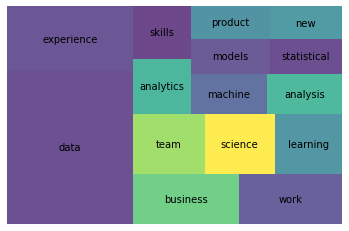

In [296]:
import squarify
import matplotlib.pyplot as plt


squarify.plot(sizes=top_fifteen['count'], label=top_fifteen['word'], alpha=.8 )
plt.axis('off')
plt.show()

In [297]:
listings.head()

,description,title,tokenized
0,bjob requirements conceptual understanding in ...,Data scientist,"[bjob, requirement, conceptual, understanding,..."
1,job description as a data scientist 1 you wil...,Data Scientist I,"[job, description, , data, scientist, 1, help..."
2,as a data scientist you will be working on con...,Data Scientist - Entry Level,"[data, scientist, work, consult, business, res..."
3,4969 6756 a monthcontractunder the general su...,Data Scientist,"[4969, , 6756, monthcontractunder, general, s..."
4,location usa multiple locations 2 years of an...,Data Scientist,"[location, usa, , multiple, location, 2, year..."


In [337]:
listing = listings[['description', 'title']].copy()

In [332]:
ideal_job= "Remote work. Opportunities for growth. Machine learning. Biology. Medicine."

In [333]:
appendable = pd.DataFrame({'description':[ideal_job], 'title':['IDEAL JOB']})

In [334]:
appendable

,description,title
0,Remote work. Opportunities for growth. Machine...,IDEAL JOB


In [338]:
listing=listing.append(appendable).reset_index()

In [339]:
listing.tail()

,index,description,title
422,422,internshipat uber we ignite opportunity by set...,2019 PhD Data Scientist Internship - Forecasti...
423,423,200000 350000 a yeara million people a year d...,Data Scientist - Insurance
424,424,bsenior data scientist job description about ...,Senior Data Scientist
425,425,cerner intelligence is a new innovative organi...,Data Scientist
426,0,Remote work. Opportunities for growth. Machine...,IDEAL JOB


## 5) Use Scikit-Learn's tfidfVectorizer to get a TF-IDF feature matrix

In [238]:
def tokenize(document):
    """
    Takes a doc and returns a list of tokens in the form of lemmas.
    Stop words and punctuation are filtered out. 
    """
    
    doc = nlp(document)
    
    return [token.lemma_.strip() for token in doc if (token.is_stop != True) and (token.is_punct != True)]

In [340]:
##### Your Code Here #####

# Instantiate (create an instance of a) Vectorizer Object (Method)
tfidf = TfidfVectorizer(tokenizer=tokenize)

#Create a vocabulary and get word counts per document
fm = tfidf.fit_transform(listing['description'])


dtm = pd.DataFrame(data = fm.toarray(), columns=tfidf.get_feature_names())

dtm.head()

,,0,00,02,02115,03,030,030547069,031819,032519,...,zf,zfs,zheng,zillow,zogsport,zone,zoom,zuckerberg,zurich,zurichs
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.106589,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.048183,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.093123,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.110015,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.082984,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 6) Create a NearestNeighbor Model. Write the description of your ideal datascience job and query your job listings. 

In [341]:
##### Your Code Here #####
from sklearn.neighbors import NearestNeighbors

# Fit on DTM
nn = NearestNeighbors(n_neighbors=5, algorithm='kd_tree')
nn.fit(dtm);

In [255]:
#returns list of values
example_doc = dtm.iloc[0].values
doc = [example_doc]
doc

[array([0., 0., 0., ..., 0., 0., 0.])]

In [248]:
neigh_dist, neigh_index = nn.kneighbors(doc)

In [249]:
neigh_dist

array([[0.        , 1.28037812, 1.2856502 , 1.30654147, 1.31097791]])

In [250]:
neigh_index

array([[  0, 276, 274, 115, 338]])

In [343]:
# Using ideal job description
ideal_job_des = dtm.iloc[426].values
job = [ideal_job_des]
job

[array([0., 0., 0., ..., 0., 0., 0.])]

In [344]:
neigh_dist, neigh_index = nn.kneighbors(job)

In [345]:
neigh_index

array([[426, 382, 424, 123,  23]])

In [355]:
def return_matches(neigh_index):
    matches = []

    for i in range(4):
        matches.append(neigh_index[0][i])
        
    return matches

In [360]:
return_matches(neigh_index)

[426, 382, 424, 123]

In [361]:
listing['description'][424]

'bsenior data scientist job description  about us  amplion synthesizes the worlds biomedical knowledge to accelerate precision medicine and enable confident strategic decisioning in drug and diagnostic development the companys saas platform leverages machine learning to provide actionable intelligence across millions of disparate data sources delivering the leading solution for preclinical and clinical evidence in the life sciences industry  all of us at amplion are extremely passionate about enabling the life science industry to deliver on the promise of precision medicine no disruption of a major industry happens with an individual it takes a great team aligned around something meaningful and big if you share in our passion and want to work for a growing company with the opportunity for professional growth with purpose wed love to meet you  the role  we are looking for a data scientist who will support our effort to accelerate the realization of precision medicine you will be working

## Stretch Goals

 - Try different visualizations for words and frequencies - what story do you want to tell with the data?
 - Scrape Job Listings for the job title "Data Analyst". How do these differ from Data Scientist Job Listings
 - Try and identify requirements for experience specific technologies that are asked for in the job listings. How are those distributed among the job listings?
 - Use a clustering algorithm to cluster documents by their most important terms. Do the clusters reveal any common themes?
  - **Hint:** K-means might not be the best algorithm for this. Do a little bit of research to see what might be good for this. Also, remember that algorithms that depend on Euclidean distance break down with high dimensional data.
 - Create a labeled dataset - which jobs will you apply for? Train a model to select the jobs you are most likely to apply for. :) 